# Градиентный спуск с визуализацией

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def my_GD(f, df, x0:np.ndarray, lr:float = 0.1, eps:float = 1e-06) -> np.ndarray: # :function - тайпинг
    res = [x0]
    i = 0
    while True:
        i=i+1
        x0 = x0 - lr*df(x0)
        res.append(x0)
        if (np.linalg.norm(df(x0)) < eps) or (i > 2000):
            break
    return np.array(res)

In [3]:
f = lambda x: x[0]**2 + x[1]**2
df = lambda x: np.array([2*x[0], 2*x[1]])
test_case = [f, df]
path = my_GD(*test_case, [21,20])

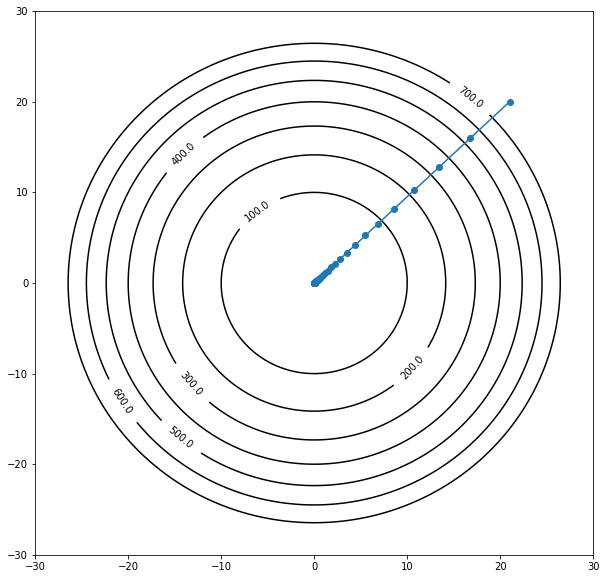

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

xvec = np.linspace(-40.0, 40.0, 700)
yvec = np.linspace(-40.0, 40.0, 700)

x1, x2 = np.meshgrid(xvec, yvec)

tmp = np.linspace(0.0, 700.0, 8)

obj = x1**2 + x2**2
cntr = ax.contour(x1, x2, obj, tmp, colors='black')
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

ax.plot(path.T[0], path.T[1])
ax.scatter(path.T[0], path.T[1])

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)

plt.show()

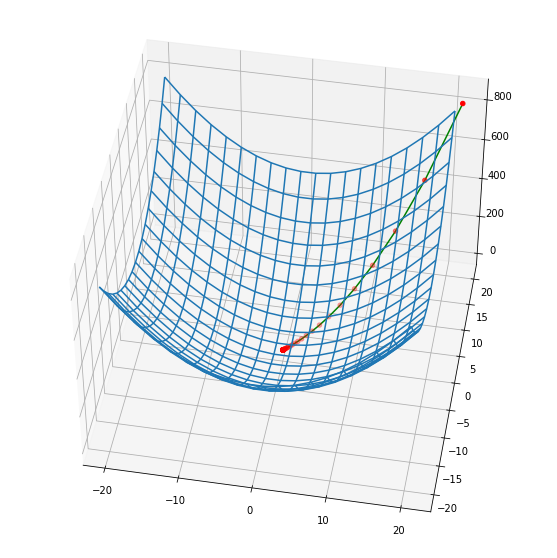

In [5]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))
ax.view_init(45, -80)

X = np.linspace(-20, 20, 20)
Y = np.linspace(-20, 20, 20)
X, Y = np.meshgrid(X, Y)
Z = f([X,Y])
ax.plot_wireframe(X, Y, Z)

Z = f([path.T[0], path.T[1]])
ax.plot(path.T[0], path.T[1], Z, zdir='z', color='g')
ax.scatter(path.T[0], path.T[1], Z, zdir='z', color='r')